In [38]:
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = read_csv("./HousingData.csv")

df = df[["CRIM", "ZN", "MEDV"]].dropna()
X = df[["CRIM", "ZN"]].values
y = df["MEDV"].values


'''
x - x min / x max - x min
'''
# scaling
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)




Mean Squared Error: 62.392750773879335
R² Score: 0.24618973917053277


In [44]:
# creating my own loop
import numpy as np

n_samples, n_features = X.shape
X = np.hstack([X, np.ones((n_samples, 1))])  # last column for bias
w = np.zeros((n_features + 1, 1))  # weights + bias

# Hyperparameters
lr = 0.01
epochs = 1000
cost_history = []

y = df["MEDV"].values.reshape(-1, 1)  # Shape: (n_samples, 1)



In [45]:
for epoch in range(epochs):
    y_pred = X @ w  # matrix multiplication
    error = y_pred - y
    cost = np.mean(error ** 2)
    cost_history.append(cost)

    # Gradient calculation
    gradients = (2 / n_samples) * (X.T @ error)

    # Update weights
    w -= lr * gradients

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost:.4f}")



Epoch 0, Cost: 582.5993
Epoch 100, Cost: 79.5216
Epoch 200, Cost: 77.3913
Epoch 300, Cost: 75.6359
Epoch 400, Cost: 74.1833
Epoch 500, Cost: 72.9753
Epoch 600, Cost: 71.9652
Epoch 700, Cost: 71.1155
Epoch 800, Cost: 70.3960
Epoch 900, Cost: 69.7824


In [46]:
# Final weights and bias
final_weights = w[:-1]
final_bias = w[-1]
print("\nFinal Weights:", final_weights.ravel())
print("Final Bias:", final_bias.item())

# Predictions and Evaluation
y_pred_final = X @ w
mse = np.mean((y - y_pred_final) ** 2)
print("Final MSE:", mse)



Final Weights: [-5.6836585   9.70283422  4.30484354  4.30484354  4.30484354  4.30484354]
Final Bias: 4.304843536535734
Final MSE: 69.25505143802901


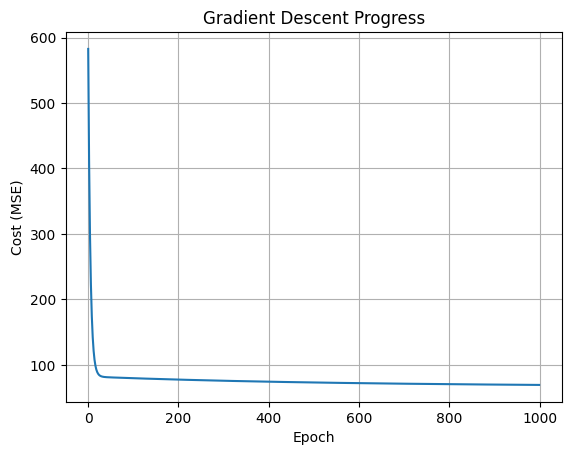

In [47]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), cost_history)
plt.xlabel("Epoch")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.grid(True)
plt.show()
